In [10]:
import config
import ast

import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import statistics

from utils.pandas_dataframe import grid_display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from itertools import permutations
import gc

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from morfist import MixedRandomForest

# grid search
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import GridSearchCV


from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor

from IPython.display import display


%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format',lambda x: '%.2f' % x)
# pd.set_option('display.max_rows', 5)
pd.set_option('display.max_rows', None)

In [12]:
data = pd.read_excel('../Data/2022-train-v2.xlsx')

In [13]:
data_y = data[['sensor_point5_i_value', 'sensor_point6_i_value',\
               'sensor_point7_i_value', 'sensor_point8_i_value',\
               'sensor_point9_i_value', 'sensor_point10_i_value']]
data_x = data.drop(['sensor_point5_i_value', 'sensor_point6_i_value',\
                    'sensor_point7_i_value', 'sensor_point8_i_value',\
                    'sensor_point9_i_value', 'sensor_point10_i_value'], axis=1)

In [14]:
data_x = data_x.fillna(0)

In [15]:
# X變數標準化
scaler = StandardScaler().fit(data_x)
data_x_S = scaler.transform(data_x)

In [16]:
model_select = Pipeline([('poly',PolynomialFeatures(degree = 2)),
                         ('std_scaler', StandardScaler()),
                         ('mod', config.model_info['Lasso']['Model'])  # 修改model
                        ])

model_select.fit(data_x, data_y.loc[:,config.Y_variable])

y_predict = model_select.predict(data_x)
y_predict

array([50.16352698, 50.67599076, 50.67599076, 50.67599076, 51.54701064,
       51.54701064, 51.54701064, 51.54701064, 52.87675622, 52.87675622,
       50.91643364, 50.91643364, 50.91643364, 50.91643364, 61.81657385,
       61.81657385, 61.21941023, 61.21941023, 60.33995867, 60.37880326,
       60.37880326, 60.35734554, 59.49779769, 59.49779769, 59.49779769,
       59.48303167, 62.51283851, 73.99835796, 73.99835796, 74.3854853 ,
       74.3854853 , 74.3854853 , 74.3854853 , 74.33549242, 74.82616401,
       74.82616401, 74.82616401, 74.82616401, 74.82616401, 74.82616401,
       74.82616401, 74.82616401, 76.3997495 , 76.3997495 , 76.3997495 ,
       73.72841003, 73.72841003, 73.72841003, 73.72848092, 73.29774323,
       73.23908006, 73.23908006, 73.13556894, 73.55299305, 73.55299305,
       74.46943046, 74.46943046, 74.46943046, 74.44243191, 74.44243191,
       77.37889721, 77.37889721, 77.09031027, 77.06093449, 77.00426867,
       77.75091506, 77.75091506, 77.92710693, 78.18786802, 79.04

In [17]:
k_fold_RMSE = -cross_val_score(model_select, 
                               data_x,
                               data_y.loc[:,config.Y_variable], 
                               cv = 5, 
                               scoring = 'neg_root_mean_squared_error').mean()

print('RMSE:' + str(round(k_fold_RMSE,2)))

RMSE:14.43


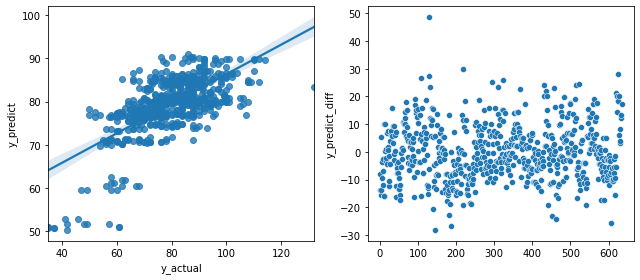

In [18]:
y_predict_diff = data_y.loc[:,config.Y_variable] - y_predict

model_result = pd.DataFrame({'y_predict_diff':y_predict_diff,
                             'y_actual':data_y.loc[:,config.Y_variable],
                             'y_predict':y_predict})
# display(Y_predict_diff)

# seaborn呈現結果
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 預測值跟實際值分布狀況
sns.regplot(x = 'y_actual', 
            y = 'y_predict',
            data = model_result, 
            ax=axes[0])
    
    # 每筆資料的差異
sns.scatterplot(x = model_result.index,
                y = 'y_predict_diff',
                data = model_result, 
                ax=axes[1])
    
    
plt.tight_layout()